In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [112]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [113]:
import warnings
warnings.simplefilter("ignore")

In [114]:
df = pd.read_csv("./data/202306_202306_연령별인구현황_월간.csv", encoding="ms949")
df.head(1)

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
0,서울특별시 (1100000000),"9,414,093","9,414,093","528,601","742,606","1,376,043","1,426,858","1,433,451","1,490,305","1,312,500","725,930","332,435","43,869","1,495"


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3877 non-null   object
 1   2023년06월_계_총인구수     3877 non-null   object
 2   2023년06월_계_연령구간인구수  3877 non-null   object
 3   2023년06월_계_0~9세     3877 non-null   object
 4   2023년06월_계_10~19세   3877 non-null   object
 5   2023년06월_계_20~29세   3877 non-null   object
 6   2023년06월_계_30~39세   3877 non-null   object
 7   2023년06월_계_40~49세   3877 non-null   object
 8   2023년06월_계_50~59세   3877 non-null   object
 9   2023년06월_계_60~69세   3877 non-null   object
 10  2023년06월_계_70~79세   3877 non-null   object
 11  2023년06월_계_80~89세   3877 non-null   object
 12  2023년06월_계_90~99세   3877 non-null   object
 13  2023년06월_계_100세 이상  3877 non-null   object
dtypes: object(14)
memory usage: 424.2+ KB


In [117]:
# 2023년 06월_계_총인구수 => 총인구수
# 모든 컬럼명에 "2023년06월_계_" 제거

df.columns = df.columns.str.replace("2023년06월_계_","")

In [118]:
df.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [119]:
# 총 인구수, 연령구간 인구수 삭제
df.drop(columns=["총인구수","연령구간인구수"],inplace=True)

### 특정 동 데이터 탐색

In [120]:
pyeongchang = df[df["행정구역"].str.contains("평창동")]
pyeongchang

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1037,1525,2103,2080,2506,3159,2748,1360,815,133,10


In [121]:
pyeongchang.drop(columns=["행정구역"], inplace=True)

In [130]:
pyeongchang = pyeongchang.T

In [131]:
pyeongchang.columns=["인구수"]

In [132]:
pyeongchang

,인구수
0~9세,1037
10~19세,1525
20~29세,2103
30~39세,2080
40~49세,2506
50~59세,3159
60~69세,2748
70~79세,1360
80~89세,815
90~99세,133


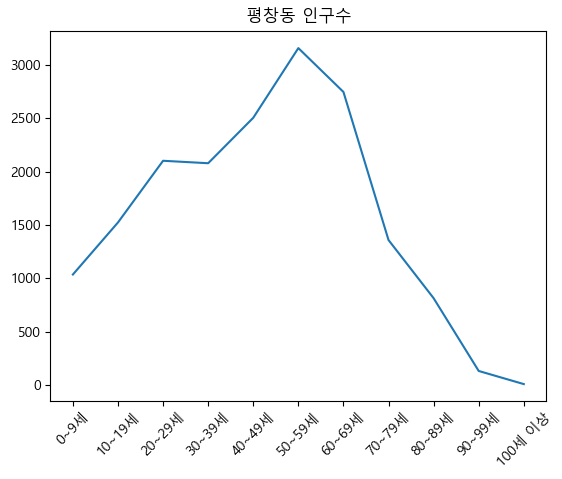

In [135]:
plt.plot(pyeongchang["인구수"])
plt.title("평창동 인구수")
plt.xticks(rotation=45)
plt.show()

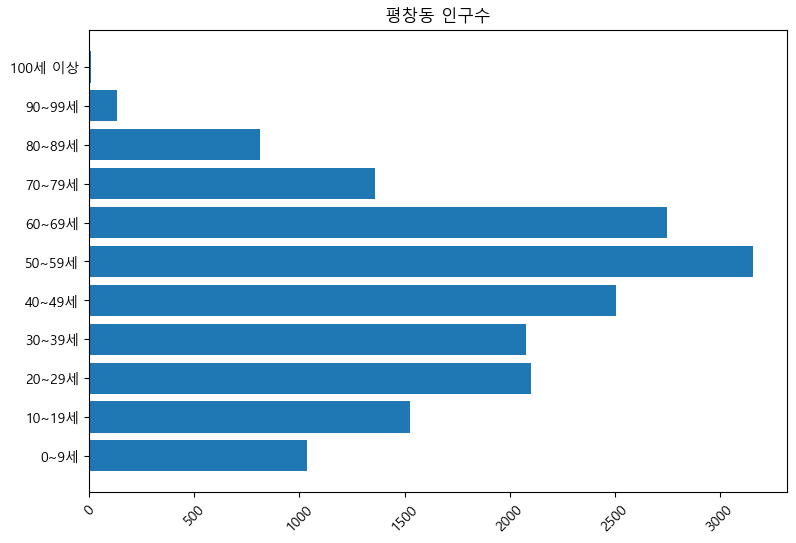

In [138]:
plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.xticks(rotation=45)
plt.barh(pyeongchang.index,pyeongchang["인구수"])
plt.show()

In [155]:
dong = input("인구구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요")

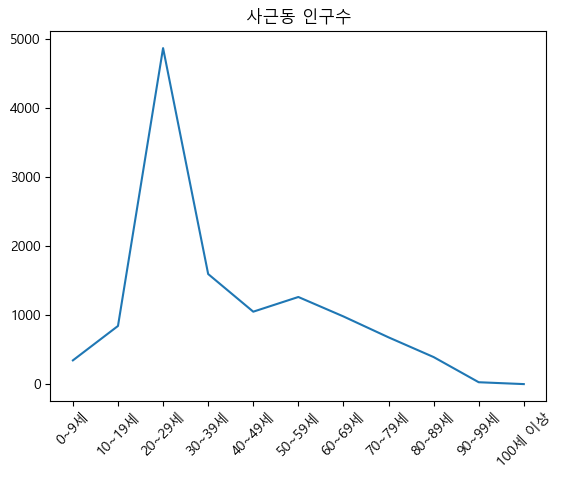

In [156]:
request = df[df["행정구역"].str.contains(dong)]
request.drop(columns=["행정구역"],inplace=True)
request = request.T
plt.plot(request)
plt.title(dong+" 인구수")
plt.xticks(rotation=45)
plt.show()